In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Carga del dataset
boston = pd.read_csv("BostonHousing.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
# Selección de las variables independientes y objetivo
X_p = boston[["RM"]]
y_p = boston["MEDV"]

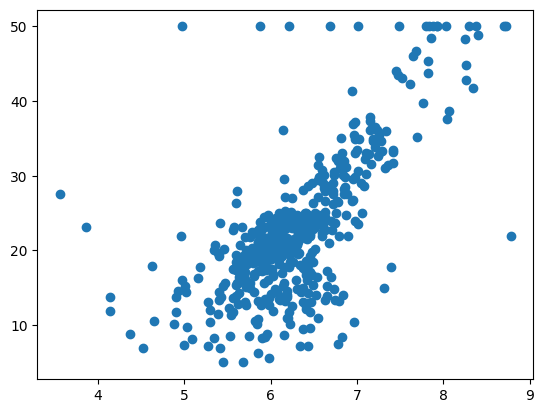

In [4]:
# Gráfica de la curva de las variables
plt.scatter(X_p, y_p)

plt.show()

In [5]:
# Separación de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=0.2)

In [6]:
# Definición del grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

# Transformación de las características existentes a caraterísticas de mayor grado
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

In [7]:
# Definición del algoritmo
modelo = LinearRegression()

# Entrenamiento del modelo
modelo.fit(X_train_poli, y_train)

LinearRegression()

In [8]:
#Predicciones del modelo
y_pred = modelo.predict(X_test_poli)

In [9]:
comparativa = pd.DataFrame({"X_polinomial": X_test.iloc[:,0].reset_index(drop=True), "y_prueba": y_test.reset_index(drop=True), "y_pred":y_pred}, index=list(range(0, len(y_pred))))
comparativa

,X_polinomial,y_prueba,y_pred
0,5.895,18.5,18.655581
1,6.861,28.5,26.764299
2,6.433,24.5,22.610812
3,6.728,30.1,25.378056
4,5.783,22.5,18.009491
...,...,...,...
97,6.335,18.1,21.785324
98,7.024,34.9,28.580735
99,6.871,24.8,26.872010
100,6.461,9.6,22.855258


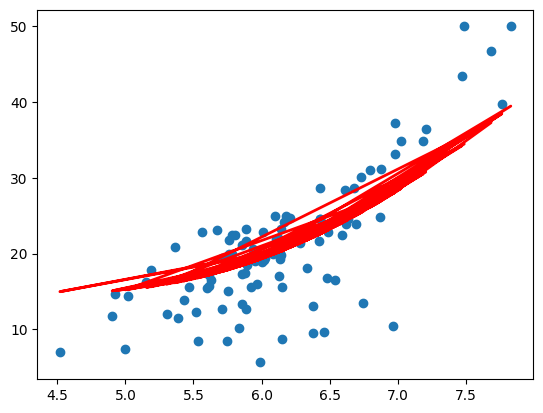

In [10]:
# Gráfica de los predichos y los de prueba
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = "red", linewidth = 2)

plt.show()

In [11]:
# Cálculo de la pendiente e intersección
print("Pendiente:", modelo.coef_)
print("Intersección:", modelo.intercept_ )

Pendiente: [  0.         -22.67294055   2.43548589]
Intersección: 67.67693455585126


In [12]:
# Precisión del modelo
print(modelo.score(X_train_poli, y_train))

0.5310091405973056
